<a href="https://colab.research.google.com/github/kkkumar2/Shoe_classification/blob/main/tweet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Imarticus/Tweet_classification/datasets/Datasets

/content/drive/MyDrive/Imarticus/Tweet_classification/datasets/Datasets


In [3]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import accuracy_score
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation,LSTM
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Embedding,SpatialDropout1D
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Imarticus/Tweet_classification/datasets/Datasets/tweets_train.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         16999 non-null  object
 1   user_location     13393 non-null  object
 2   user_description  15838 non-null  object
 3   user_created      17000 non-null  object
 4   user_followers    17000 non-null  int64 
 5   user_friends      17000 non-null  int64 
 6   user_favourites   17000 non-null  int64 
 7   user_verified     17000 non-null  bool  
 8   date              17000 non-null  object
 9   hashtags          13351 non-null  object
 10  source            17000 non-null  object
 11  is_retweet        17000 non-null  bool  
 12  clean_text        16992 non-null  object
 13  Sentiment         17000 non-null  object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.6+ MB


In [96]:
df1 = pd.read_csv('/content/drive/MyDrive/Imarticus/Tweet_classification/datasets/Datasets/tweets_test.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         3068 non-null   object
 1   user_location     2467 non-null   object
 2   user_description  2847 non-null   object
 3   user_created      3068 non-null   object
 4   user_followers    3068 non-null   int64 
 5   user_friends      3068 non-null   int64 
 6   user_favourites   3068 non-null   int64 
 7   user_verified     3068 non-null   bool  
 8   date              3068 non-null   object
 9   hashtags          2420 non-null   object
 10  source            3068 non-null   object
 11  is_retweet        3068 non-null   bool  
 12  clean_text        3067 non-null   object
dtypes: bool(2), int64(3), object(8)
memory usage: 269.8+ KB


**WE Cannot Use tweet_Test data for testing because it is not having the ground truth which we can use for backward propagation or confusion matrix or classification report , hence will be spitting train data only into two and will be using that for prediction **

In [7]:
df['clean_text'].value_counts()

If you re not paying for the product then you are the product TheSocialDilemma                                            57
Watching TheSocialDilemma                                                                                                 36
If you are not paying for the product then you are the product TheSocialDilemma                                           29
TheSocialDilemma is a must watch                                                                                          24
There are only two industries that call their customers users illegal drugs and software Edward Tufte TheSocialDilemma    24
                                                                                                                          ..
Have you seen THE SOCiAL DiLEMMA Scary Shit Y all Artificial Intelligence is REAL TAP iN Ful                               1
It s a great documentary Shows how much social media is driving us and the cons of it which even founde                    1


In [8]:
df_new = df.loc[:,["clean_text","Sentiment"]]
df_new

,clean_text,Sentiment
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TheSocialDilemma If we don t agree on what is ...,Positive
2,Watching TheSocialDilemma scary to see social ...,Negative
3,You check your social media before you pee in ...,Positive
4,watch thesocialdilemma and see what s actually...,Negative
...,...,...
16995,Watching TheSocialDilemma,Neutral
16996,If you re not paying for the product you are t...,Neutral
16997,Watching TheSocialDilemma Let s see,Neutral
16998,Yes TheSocialDilemma what a perfect time to be...,Positive


In [14]:
df_new['Sentiment'].value_counts()

Positive    8059
Neutral     5927
Negative    3014
Name: Sentiment, dtype: int64

In [11]:
df_new['Sentiment'].isnull().sum()

0

In [13]:
df_new[df_new['clean_text'].isnull()]

,clean_text,Sentiment
997,NaN,Neutral
2460,NaN,Neutral
4130,NaN,Neutral
5817,NaN,Neutral
9121,NaN,Neutral
9375,NaN,Neutral
15791,NaN,Neutral
16462,NaN,Neutral


In [15]:
df_train = df_new.dropna()
df_train

,clean_text,Sentiment
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TheSocialDilemma If we don t agree on what is ...,Positive
2,Watching TheSocialDilemma scary to see social ...,Negative
3,You check your social media before you pee in ...,Positive
4,watch thesocialdilemma and see what s actually...,Negative
...,...,...
16995,Watching TheSocialDilemma,Neutral
16996,If you re not paying for the product you are t...,Neutral
16997,Watching TheSocialDilemma Let s see,Neutral
16998,Yes TheSocialDilemma what a perfect time to be...,Positive


In [24]:
pat1 = re.compile(r'the+')

def clean_text(text):
    #lowercase text
    text = text.lower() 
    # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = pat1.sub(' ', text)

    # remove stopwors from text
    text = ' '.join(word for word in text.split() if word not in stop_words) 
    return text


In [28]:
clean_text('THeSocialDilemma')

'socialdilemma'

**Tokenizing the Words**

In [29]:
# Reset the index of dataframe
df_train = df_train.reset_index(drop=True)
# Create a pattern to filter
repalce_space = re.compile('[/(){}\[\]\|@,;]')
pat1 = re.compile(r'the+')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    #lowercase text
    text = text.lower() 
    # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = repalce_space.sub(' ', text)
    text = pat1.sub(' ', text)

    # remove stopwors from text
    text = ' '.join(word for word in text.split() if word not in stop_words) 
    return text


In [30]:
# Clean the data set
df_train['clean_text'] = df_train['clean_text'].apply(clean_text)
df_train['clean_text']

0        socialdilemma eye opener please ignore irony t...
1               socialdilemma agree true thing truth toast
2        watching socialdilemma scary see social media ...
3        check social media pee morning whilst peeing 2...
4        watch socialdilemma see actually going share s...
                               ...                        
16987                               watching socialdilemma
16988                 paying product product socialdilemma
16989                       watching socialdilemma let see
16990    yes socialdilemma perfect time released netfli...
16991    impression actually sitting jail cell socialdi...
Name: clean_text, Length: 16992, dtype: object

In [41]:
df_neutral = df_train[df_train['Sentiment'] == 'Neutral']
df_neutral

,clean_text,Sentiment
0,socialdilemma eye opener please ignore irony t...,Neutral
6,watching socialdilemma let see change things,Neutral
10,socialdilemma must watch iota concern society ...,Neutral
12,recommend everyone go watch socialdilemma netf...,Neutral
14,one things watching documentaries like sociald...,Neutral
...,...,...
16984,must watch socialdilemma socialmedia manipulat...,Neutral
16985,11 things stop manipulated phone socialdilemma...,Neutral
16987,watching socialdilemma,Neutral
16988,paying product product socialdilemma,Neutral


In [42]:
df_negative = df_train[df_train['Sentiment'] == 'Negative']
df_negative

,clean_text,Sentiment
2,watching socialdilemma scary see social media ...,Negative
4,watch socialdilemma see actually going share s...,Negative
5,wait mean tell phone constantly trying keep en...,Negative
8,two industries call customers users illegal dr...,Negative
9,nothing say socialdilemma said would anything ...,Negative
...,...,...
16975,must watch wanna know inconvenient truth socia...,Negative
16976,false news spreads 6 times faster real news tw...,Negative
16980,understand message behind socialdilemma please...,Negative
16986,socialdilemma dropped weekend netflix incredib...,Negative


In [43]:
df_positive = df_train[df_train['Sentiment'] == 'Positive']
df_positive

,clean_text,Sentiment
1,socialdilemma agree true thing truth toast,Positive
3,check social media pee morning whilst peeing 2...,Positive
7,social dilemma eye opening netflix documentary...,Positive
15,highly recommend giving social dilemma watch n...,Positive
17,watching socialdilemma netflix much eye opener...,Positive
...,...,...
16972,final thought socialdilemma stem students need...,Positive
16979,whole making social media horror movie softcor...,Positive
16981,1 thoughtful regulation internet amp socmed 2 ...,Positive
16983,gonna leave social media watching social dilem...,Positive


In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
stop_word = set(STOPWORDS)


def generate_wordcloud(text,title = None): 
    
    #Creating wordcloud object and getting list of frequent words from text
    wordcloud = WordCloud(background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          scale=3,
                          stopwords = stop_word,).generate(text)
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
   
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.show()



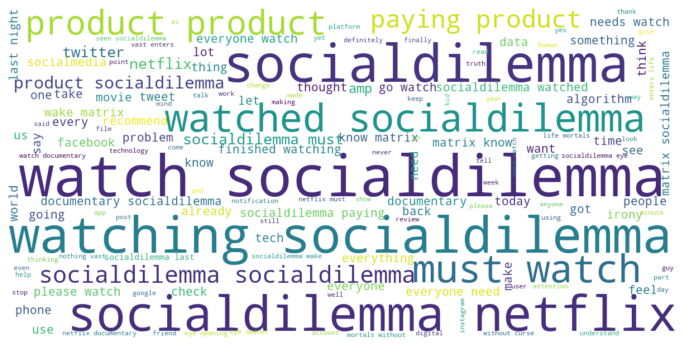

In [45]:
generate_wordcloud(' '.join(df_neutral.iloc[:,0]))

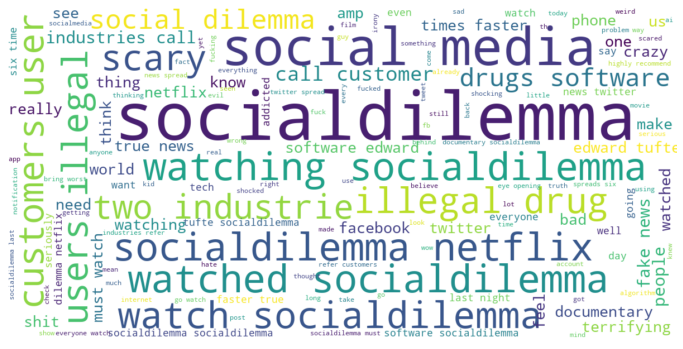

In [46]:
generate_wordcloud(' '.join(df_negative.iloc[:,0]))

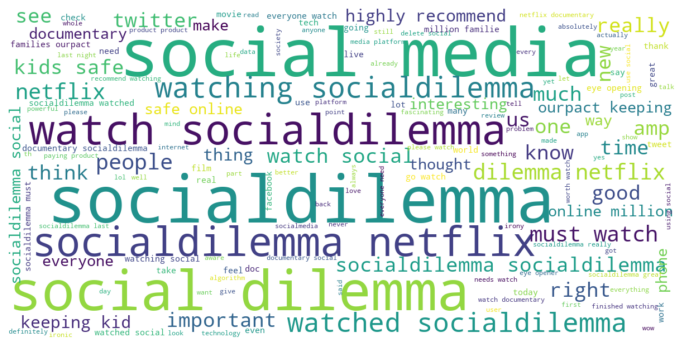

In [47]:
generate_wordcloud(' '.join(df_positive.iloc[:,0]))

In [51]:
# The maximum number of words to be used. (most frequent)
max_no_words = 20000
# Max number of words in each complaint.
max_seq_len = 200
# Create tokenizer object
tokenizer = Tokenizer(num_words=max_no_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# Fit the tokenizer on text data
tokenizer.fit_on_texts(df_train['clean_text'].values)
# Count how many unique tokes are in these observations
word_index = tokenizer.word_index
print('Number of unique tokens %s' % len(word_index))

Number of unique tokens 12467


In [53]:
# Text to sequences 
X = tokenizer.texts_to_sequences(df_train['clean_text'].values)

# Padding the sequences
X = pad_sequences(X, maxlen=max_seq_len)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (16992, 200)


In [56]:
# Create dummies variables for output variable
Y = pd.get_dummies(df_train['Sentiment']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (16992, 3)


In [57]:
#Traning and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11894, 200) (11894, 3)
(5098, 200) (5098, 3)


In [116]:
import tensorflow as tf

#Create sequential object
model = Sequential()
#Embedding layer
model.add(Embedding(max_no_words, 100, input_length=X.shape[1]))
#Dropout layer
model.add(SpatialDropout1D(0.2))
#RNN layer
model.add(SimpleRNN(100, input_shape = (11894, 200), return_sequences = False))

#Fully connected layer
model.add(Dense(3))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 100)          2000000   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 200, 100)         0         
 lDropout1D)                                                     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 2,020,403
Trainable params: 2,020,403
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.add(Activation('softmax'))
#Optimizer 
adam = tf.keras.optimizers.Adam(lr = 0.001)
#Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
#Fit the model on the training dataset
history = model.fit(X_train, Y_train,epochs = 30, batch_size = 32, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
335/335 [==============================] - 96s 270ms/step - loss: 0.7604 - accuracy: 0.6688 - val_loss: 0.5328 - val_accuracy: 0.7933
Epoch 2/30
335/335 [==============================] - 92s 274ms/step - loss: 0.4082 - accuracy: 0.8444 - val_loss: 0.6039 - val_accuracy: 0.7697
Epoch 3/30
335/335 [==============================] - 89s 267ms/step - loss: 0.2427 - accuracy: 0.9179 - val_loss: 0.5366 - val_accuracy: 0.8235
Epoch 4/30
335/335 [==============================] - 89s 267ms/step - loss: 0.1258 - accuracy: 0.9590 - val_loss: 0.5339 - val_accuracy: 0.8370


In [60]:
accuracy = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy [0],accuracy [1]))

160/160 [==============================] - 4s 23ms/step - loss: 0.5663 - accuracy: 0.8299
Test set
  Loss: 0.566
  Accuracy: 0.830


In [81]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(Y_test, axis = 1)
#print(accuracy_score(y_pred, y_test))
y_test

array([1, 1, 2, ..., 2, 0, 2])

In [77]:
Y_test

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [82]:
y_pred

array([2, 1, 1, ..., 2, 2, 2])

In [80]:
y_pred[0].argmax()

2

In [83]:
from sklearn.metrics import classification_report
labels = ['Neutral','Negative','Positive', ]
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     Neutral       0.73      0.62      0.67       859
    Negative       0.81      0.88      0.85      1740
    Positive       0.87      0.87      0.87      2499

    accuracy                           0.83      5098
   macro avg       0.81      0.79      0.80      5098
weighted avg       0.83      0.83      0.83      5098



In [86]:
x = np.reshape(df1['clean_text'][0], (1,-1))
x


array([['Watch theSocialDilemma then joinMastodon']], dtype='<U40')

In [97]:
df1.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'is_retweet', 'clean_text'],
      dtype='object')

In [98]:
df1['clean_text'].values

array(['Watch theSocialDilemma then joinMastodon',
       'With the 2019 2020 NBA season officially over for my beloved well done guys WeTheNorth I m back in',
       'if you want to really know about people go talk with him dont judge a person by only looking for in his social media TheSocialDilemma',
       ...,
       'Couldn t stop thinking about docu TheSocialDilemma by So decided to share my views on it o',
       'This was the best one by on TheSocialDilemma on',
       'TheSocialDilemma on Netflix wow'], dtype=object)

In [100]:
df_test = df1.dropna()

In [101]:
df_test['clean_text'] = df_test['clean_text'].apply(clean_text)
df_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
0,Doug Webb,Probably Europe,"I develop methods for effective cooperation, w...",2015-12-12 15:22:58,157,228,496,False,2020-09-15 22:53:36,"['theSocialDilemma', 'joinMastodon']",Twitter Web App,False,watch socialdilemma n joinmastodon
1,Dan Reynish,"Medicine Hat, Alberta",News Anchor at Noon and 5 pm on CHAT TV. Canad...,2011-09-10 12:17:10,1722,2500,13912,False,2020-09-12 04:43:03,['WeTheNorth'],Twitter Web App,False,2019 2020 nba season officially beloved well d...
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,WA,Heliophile🌞☀️• #Rugby • Wildlifer • #HIV • #So...,2009-04-17 13:35:02,1143,2692,11999,False,2020-09-12 18:28:18,"['TheSocialDilemma', 'Netflix']",Twitter for iPhone,False,watched socialdilemma netflix
6,Massimo Gaspari,"Princeton, NJ",Astrophysicist at @Princeton University. Lyman...,2018-06-04 15:00:24,301,78,3777,False,2020-09-20 18:24:38,['Twitter'],Twitter Web App,False,hey twitter ais healthy thing us increasing aw...
7,Kieran Edward,Shanghai,PE Teacher inspired to share and learn from ot...,2016-09-18 17:49:57,96,111,43,False,2020-09-13 15:20:25,['TheSocialDilemma'],Twitter for Android,False,watched socialdilemma appreciate irony posting...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,🤍𝕿𝖍𝖊𝖗𝖊𝖘𝖆𝕿𝖗𝖊𝖘𝕷𝖊𝖈𝖍𝖊🖤,Los Angeles,Monica Binx. ℌ𝔢𝔞𝔩𝔦𝔫𝔤 𝔱𝔥𝔯𝔬𝔲𝔤𝔥 𝔰𝔭𝔦𝔯𝔦𝔱𝔲𝔞𝔩𝔦𝔱𝔶 and ...,2009-03-04 22:00:06,335,683,3930,False,2020-09-22 12:57:35,['TheSocialDilemma'],Twitter for iPhone,False,dems liberals deleted ir social media bc watch...
3063,𝘔𝘶𝘳𝘪;🦋,𝘶𝘯𝘥𝘦𝘳 𝘵𝘩𝘦 𝘱𝘢𝘭𝘮𝘴🌴,𝘸𝘪𝘧𝘦 // 𝘤𝘢𝘵 𝘮𝘰𝘮 // 𝘱𝘴𝘺𝘤𝘩𝘰𝘭𝘰𝘨𝘪𝘴𝘵; 🧠 𝘣𝘦𝘢𝘤𝘩𝘣𝘶𝘮;🌴,2009-07-29 03:18:16,942,357,9917,False,2020-09-14 12:27:35,['TheSocialDilemma'],Twitter for iPhone,False,everybody watch socialdilemma
3064,Didi Crawford,"Birmingham, England",Traveller | Blogger | Currently growing a huma...,2011-12-06 09:24:20,468,1095,3440,False,2020-09-22 19:25:48,['TheSocialDilemma'],Twitter for iPhone,False,enjoyed socialdilemma n read
3066,Nishant Mody,Mumbai,"I love music, dogs, nature, politics & marketi...",2012-12-30 04:58:15,174,541,5482,False,2020-09-10 17:19:44,['TheSocialDilemma'],Twitter for iPhone,False,best one socialdilemma


In [102]:
# Text to sequences 
x_new = tokenizer.texts_to_sequences(df_test['clean_text'].values)

# Padding the sequences
x_new = pad_sequences(x_new, maxlen=max_seq_len)
print('Shape of data tensor:', x_new.shape)

Shape of data tensor: (1822, 200)


In [103]:
#Prediction on test observations


pred_observation = model.predict(x_new)
pred_observation = np.argmax(pred_observation, axis = 1)
labels = ['Neutral','Negative','Positive', ]
print(pred_observation[0], labels [pred_observation[0]])

1 Negative


In [107]:
def conv_name(val):
  if val == 0:
    return 'Neutral'
  elif val == 1:
    return 'Negative'
  else:
    return 'Positive'

In [108]:
results = pd.DataFrame(pred_observation)
results['output'] = results[0].apply(conv_name)

In [109]:
results

,0,output
0,1,Negative
1,1,Negative
2,1,Negative
3,2,Positive
4,1,Negative
...,...,...
1817,2,Positive
1818,1,Negative
1819,1,Negative
1820,2,Positive


In [113]:
df_test['clean_text']

0                      watch socialdilemma n joinmastodon
1       2019 2020 nba season officially beloved well d...
3                           watched socialdilemma netflix
6       hey twitter ais healthy thing us increasing aw...
7       watched socialdilemma appreciate irony posting...
                              ...                        
3061    dems liberals deleted ir social media bc watch...
3063                        everybody watch socialdilemma
3064                         enjoyed socialdilemma n read
3066                               best one socialdilemma
3067                            socialdilemma netflix wow
Name: clean_text, Length: 1822, dtype: object